In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
import cv2

In [2]:
data = pd.read_csv('C://seversteel/content/train.csv')
data.shape

(7095, 3)

In [3]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

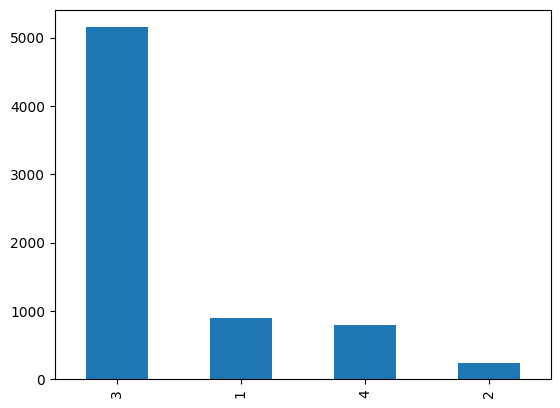

In [4]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [5]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
    image=cv2.imread("C://seversteel/content/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 7095/7095 [00:47<00:00, 149.21it/s]


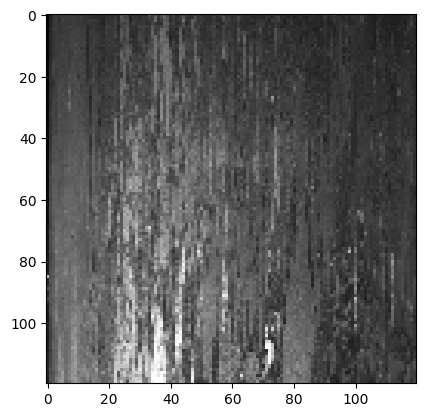

In [6]:
i = 15
plt.imshow(l1[i])

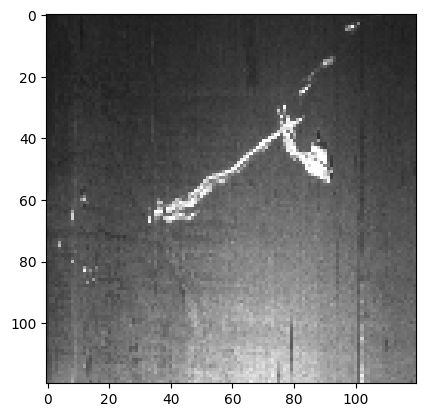

In [7]:
i = 16
plt.imshow(l1[i])

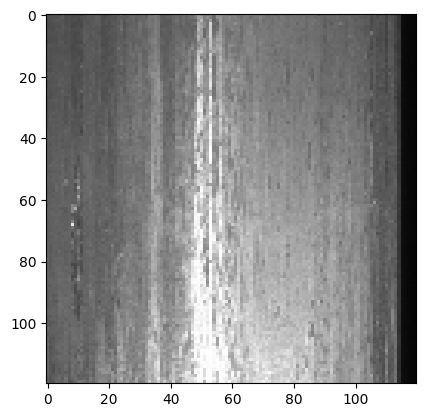

In [8]:
i = 90
plt.imshow(l1[i])

In [9]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = np.array(y)

In [10]:
X.shape

(7095, 120, 120, 3)

In [11]:
y.shape

(7095,)

In [12]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X , y)
X = X.reshape(-1,120,120,3)

In [13]:
X.shape

(20600, 120, 120, 3)

In [14]:
y = to_categorical(y)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [16]:
print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (16480, 120, 120, 3)
x_test размер: (4120, 120, 120, 3)
y_train размер: (16480, 4)
y_test размер: (4120, 4)


In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))

c:\Users\jonnr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [19]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.4783 - loss: 3.5313 - val_accuracy: 0.7138 - val_loss: 0.6811
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.7720 - loss: 0.5880 - val_accuracy: 0.7794 - val_loss: 0.5817
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8661 - loss: 0.3951 - val_accuracy: 0.8677 - val_loss: 0.3993
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9203 - loss: 0.2790 - val_accuracy: 0.8617 - val_loss: 0.3995
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9373 - loss: 0.2248 - val_accuracy: 0.8789 - val_loss: 0.3770
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9479 - loss: 0.2051 - val_accuracy: 0.9075 - val_loss: 0.3105
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9528 - loss: 0.1789 - val_accuracy: 0.8818 - val_loss: 0.3294
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.9581 - loss: 0

<Axes: title={'center': 'Loss curve'}>

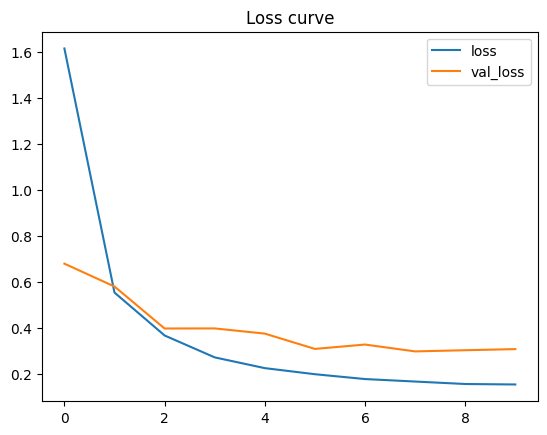

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

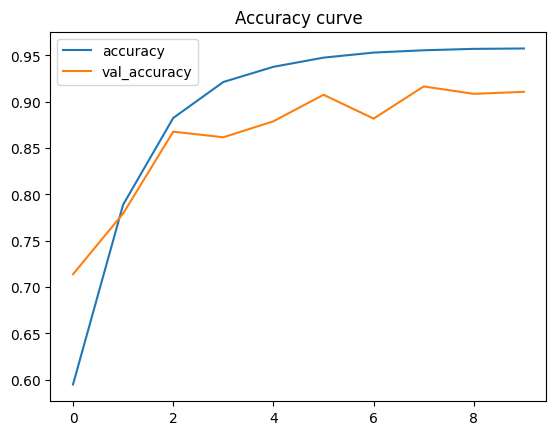

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

c:\Users\jonnr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [24]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.5031 - loss: 1.8318 - val_accuracy: 0.7444 - val_loss: 0.6709
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.7764 - loss: 0.5973 - val_accuracy: 0.7859 - val_loss: 0.5593
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.8281 - loss: 0.4663 - val_accuracy: 0.8393 - val_loss: 0.4425
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.8804 - loss: 0.3513 - val_accuracy: 0.8602 - val_loss: 0.3869
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.9057 - loss: 0.2860 - val_accuracy: 0.8840 - val_loss: 0.3534
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.9265 - loss: 0.2332 - val_accuracy: 0.8922 - val_loss: 0.3348
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9378 - loss: 0.2047 - val_accuracy: 0.8949 - val_loss: 0.3340
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.9453 - loss: 0

<Axes: title={'center': 'Loss curve'}>

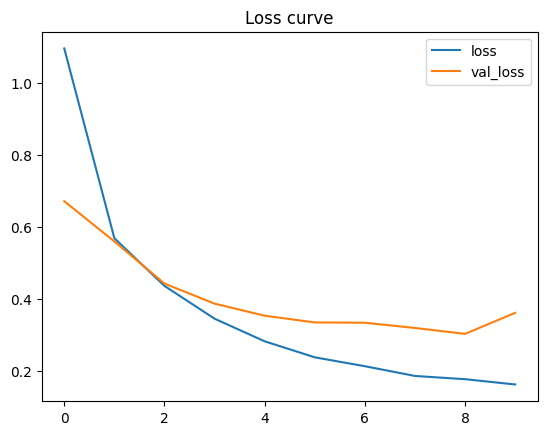

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

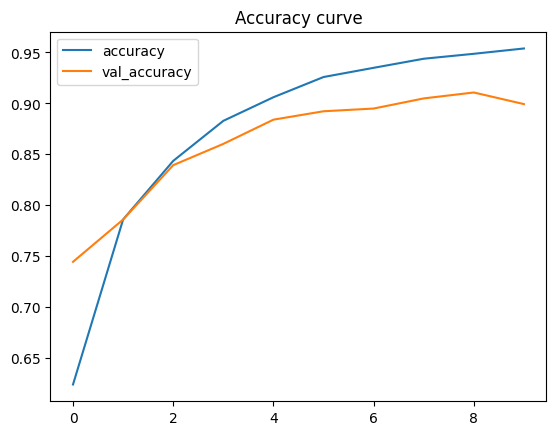

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

c:\Users\jonnr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [29]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - accuracy: 0.4358 - loss: 1.1551 - val_accuracy: 0.6165 - val_loss: 0.8374
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.6492 - loss: 0.8333 - val_accuracy: 0.7206 - val_loss: 0.7058
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.6919 - loss: 0.7495 - val_accuracy: 0.7129 - val_loss: 0.6875
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.7329 - loss: 0.6726 - val_accuracy: 0.7740 - val_loss: 0.5815
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.7680 - loss: 0.5991 - val_accuracy: 0.7864 - val_loss: 0.5480
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.7853 - loss: 0.5544 - val_accuracy: 0.8083 - val_loss: 0.5174
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.8038 - loss: 0.5113 - val_accuracy: 0.8231 - val_loss: 0.4767
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.8101 - loss: 0

<Axes: title={'center': 'Loss curve'}>

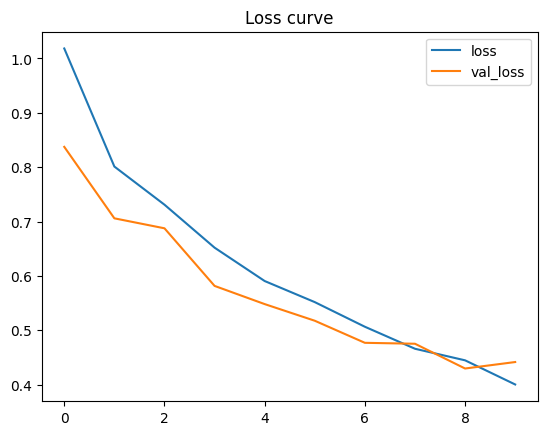

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

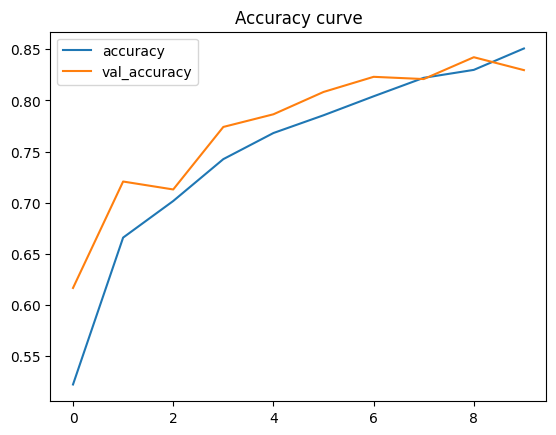

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [32]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8258 - loss: 0.4330
[+] Accuracy: 82.96%


In [33]:
from keras.models import Model
model.save('my_model_steel.keras')

In [34]:
from keras.models import load_model

loaded_model = load_model('my_model_steel.keras')

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,342 (1.60 MB)

 Trainable params: 139,780 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,562 (1.07 MB)

In [36]:
l2[:3]

[1, 3, 1]

In [37]:
X= np.array(l1[:3])
X = X/255

y = encoder.fit_transform(l2[:3])
y = np.array(y)

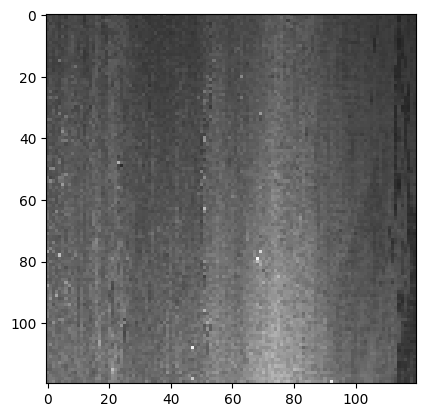

In [38]:
plt.imshow(l1[0]);

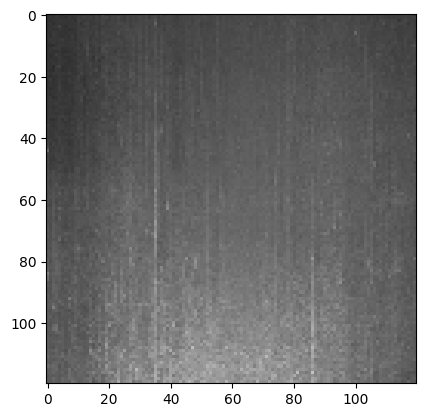

In [39]:
plt.imshow(l1[1]);

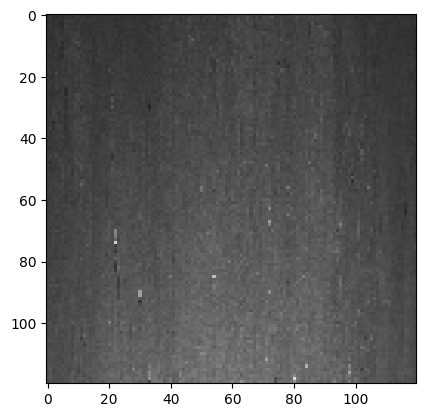

In [40]:
plt.imshow(l1[2]);

In [41]:
y =  to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

In [42]:
predictions = model.predict(X)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[9.4909203e-01, 2.3423666e-03, 4.7048431e-02, 1.5172312e-03],
       [2.1392275e-01, 1.1716212e-04, 7.1651196e-01, 6.9448158e-02],
       [7.1144795e-01, 1.3887738e-03, 2.5569710e-01, 3.1466156e-02]],
      dtype=float32)

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,342 (1.60 MB)

 Trainable params: 139,780 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,562 (1.07 MB)

In [44]:
def defeat_position(img_id, class_id):
    
    train_s = train[train.ImageId_ClassId==f"{img_id}_{class_id}"]
    #print(train_s.EncodedPixels.values[0])
    
    if not isinstance(train_s.EncodedPixels.values[0], str) and np.isnan(train_s.EncodedPixels.values[0]):
        return np.array([]), np.array([])
    
    encoded_pixels = [int(i) for i in train_s.EncodedPixels.values[0].split(" ")]

    pixcels = []
    for pos, offset in zip(encoded_pixels[0:len(encoded_pixels):2], encoded_pixels[1:len(encoded_pixels):2]):
        pixcels.extend(list(range(pos, pos+offset)))
    pixcels = np.array(pixcels)    
    x = pixcels // 256
    y = pixcels % 256  
    return x, y

def show_segmented_image(img_file, x, y, class_id):
    im = np.array(Image.open(img_file))
    
    if class_id == 4:
        im[y, x, 1] += 50
        im[y, x, 2] += 50
    else:
        im[y, x, class_id-1] += 50
        
    im = np.clip(im, 0, 255)

    plt.figure(figsize=(25,5))
    plt.imshow(im)
    plt.xticks([]);plt.yticks([]);
    plt.show()
    
def visualize_defect(class_id, n_show=20):
    cnt = 0
    for img_file in train_files:
        img_id = img_file.split('/')[-1]
        x, y = defeat_position(img_id, class_id)
        if len(x)==0:
            continue
        print(img_file, class_id)
        show_segmented_image(img_file, x, y, class_id)
        cnt += 1
        if cnt > n_show: break

In [45]:
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
train = pd.read_csv("C://seversteel/content/train.csv")

train_files = np.sort(glob("C://seversteel/content/train_images/*"))
test_files  = np.sort(glob("C://seversteel/content/test_images/*"))
print(f"number of train images: {len(train_files)}")
print(f"number of test images: {len(test_files)}")

number of train images: 12568
number of test images: 5506


In [47]:
train['ClassId'] = train['ClassId'].astype(int)

In [48]:
#train_df_b["ClassId"].value_counts().plot(kind = 'bar')
#train_df_b.groupby(['ClassId'])['ClassId'].count()
train["ClassId"].value_counts()

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

In [49]:
train["ClassId"].value_counts().sum()

7095

In [50]:
train['ImageId'].nunique()

6666

In [51]:
#train_df_b.groupby(['ImageId'])['ImageId'].count().max()
train["ImageId"].value_counts().max()

3

In [52]:
train.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 1).count()

856

In [53]:
train.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 2)

6101    db4867ee8.jpg
6102    db4867ee8.jpg
6103    db4867ee8.jpg
6650    ef24da2ba.jpg
6651    ef24da2ba.jpg
6652    ef24da2ba.jpg
Name: ImageId, dtype: object

In [54]:
train.loc[train['ImageId'].isin(['db4867ee8.jpg'])]

,ImageId,ClassId,EncodedPixels
6101,db4867ee8.jpg,1,349941 2 350194 6 350447 11 350700 15 350953 1...
6102,db4867ee8.jpg,2,354411 17 354634 50 354857 82 355096 99 355351...
6103,db4867ee8.jpg,3,233729 3008 236801 64


In [55]:
train.groupby(['ImageId','ClassId'])['ImageId'].count().max()

1

In [56]:
train_df = train.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')
train_df['count'] = train_df.count(axis=1)
train_df

ClassId,1,2,3,4,count
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
...,...,...,...,...,...
ffcf72ecf.jpg,NaN,NaN,121911 34 122167 101 122422 169 122678 203 122...,NaN,1
fff02e9c5.jpg,NaN,NaN,207523 3 207777 9 208030 15 208283 22 208537 2...,NaN,1
fffe98443.jpg,NaN,NaN,105929 5 106177 14 106424 24 106672 33 106923 ...,NaN,1


In [57]:
import cv2

def read_image_with_masks(row_id, df):
    fname_o = df.iloc[row_id].name
    fname = "C://seversteel/content/train_images" +'/' + fname_o
    onlyname = fname_o.split('.')[0]
    
    labels = df.iloc[row_id][:4]
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    shape=image.shape

    list_names = []
    list_with_all_masks = []

    for classname, label in enumerate(labels.values):
        if label is not np.nan:
            string_array = label.rstrip().split()
            int_array = [int(string) for string in string_array]
            binary_mask = create_mask(int_array, shape)
            list_with_all_masks.append(binary_mask)
            list_names.append(int(classname))
                
    return fname, onlyname, image, list_with_all_masks, list_names

def create_mask(int_array, shape):
    result = np.zeros((shape[0], shape[1]), dtype=np.float32)
    positions = map(int, int_array[0::2])
    length = map(int, int_array[1::2])
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for pos, le in zip(positions, length):
        mask[pos:(pos + le)] = 1
    result[:, :] = mask.reshape(shape[0], shape[1], order='F')
    
    binary_mask = result.astype(np.uint8)
    return binary_mask

In [58]:
def convert_masks_to_xy(masks, class_labels):
    list_with_all_masks = []
    list_names = []
    for i,mask in enumerate(masks):
        xy_arr = convert_mask_to_polygons(mask)
        for xy_sequence in xy_arr:
            list_with_all_masks.append(xy_sequence)
            list_names.append(int(class_labels[i]))
            
    return list_with_all_masks, list_names

def convert_mask_to_polygons(binary_mask) -> list[list[int | float]]:
    """ Return list of YOLO like annotations for segmentation purposes, i.e. 
    [
        [x1, y1, x2, y2, ..., xn, yn], # object_0
        [x1, y1, x2, y2, ..., xn, yn], # object_1
        ...,
        [x1, y1, x2, y2, ..., xn, yn] # object_m
    ]
    """
    annotations = []

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

    wh = np.flip(np.array(binary_mask.shape)) # for normalization purposes
    
    for contour in contours:
        #approxPolyDP
        epsilon = 0.001 * cv2.arcLength(contour, True)
        contour_approx = cv2.approxPolyDP(contour, epsilon, True)
        
        #normalization
        contour_approx=contour_approx / wh
        
        polygon = contour_approx.flatten().tolist()
        annotations.append(polygon)
    return annotations

In [59]:
import matplotlib.pyplot as plt

def visualize(image, keypoints):
    h,w = image.shape[:2]
    cpy = image.copy()
    
    for keypoint in keypoints:
        poly = np.asarray(keypoint,dtype=np.float16).reshape(-1,2) # Read poly, reshape
        poly *= [w,h] # Unscale
        
        cv2.polylines(cpy, [poly.astype('int')], True, (255, 0, 0), 2) # Draw Poly Lines
    
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(cpy)

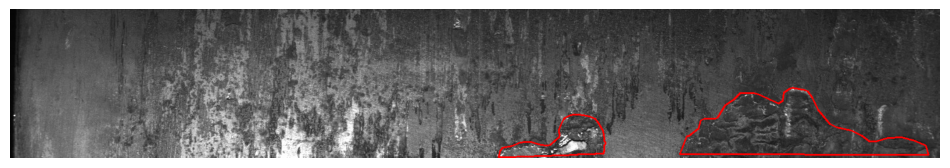

In [60]:
from PIL import Image, ImageDraw 

row_id=13

fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df)
keypoints, class_labels = convert_masks_to_xy(masks, class_labels)

visualize(image, keypoints)

#img = Image.fromarray(image)#Image.open(fname)
#h,w = image.shape[:2]
#draw = ImageDraw.Draw(img)
#for polygon in keypoints:
#    draw.polygon(polygon,outline=(0,255,0), width=5)
#img

In [61]:
from sklearn.model_selection import train_test_split

train_df_n, val_df_n = train_test_split(train_df, test_size=0.1, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df, test_size=0.9, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df_n, test_size=0.1, random_state=54)

print([len(train_df_n),len(val_df_n)])

[5999, 667]


In [62]:
from sklearn.model_selection import train_test_split

train_df_n, val_df_n = train_test_split(train_df, test_size=0.1, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df, test_size=0.9, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df_n, test_size=0.1, random_state=54)

print([len(train_df_n),len(val_df_n)])

[5999, 667]


In [63]:
import cv2
from PIL import Image, ImageDraw  
import albumentations as A 

img_size = 640

train_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    #A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
])

val_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
])

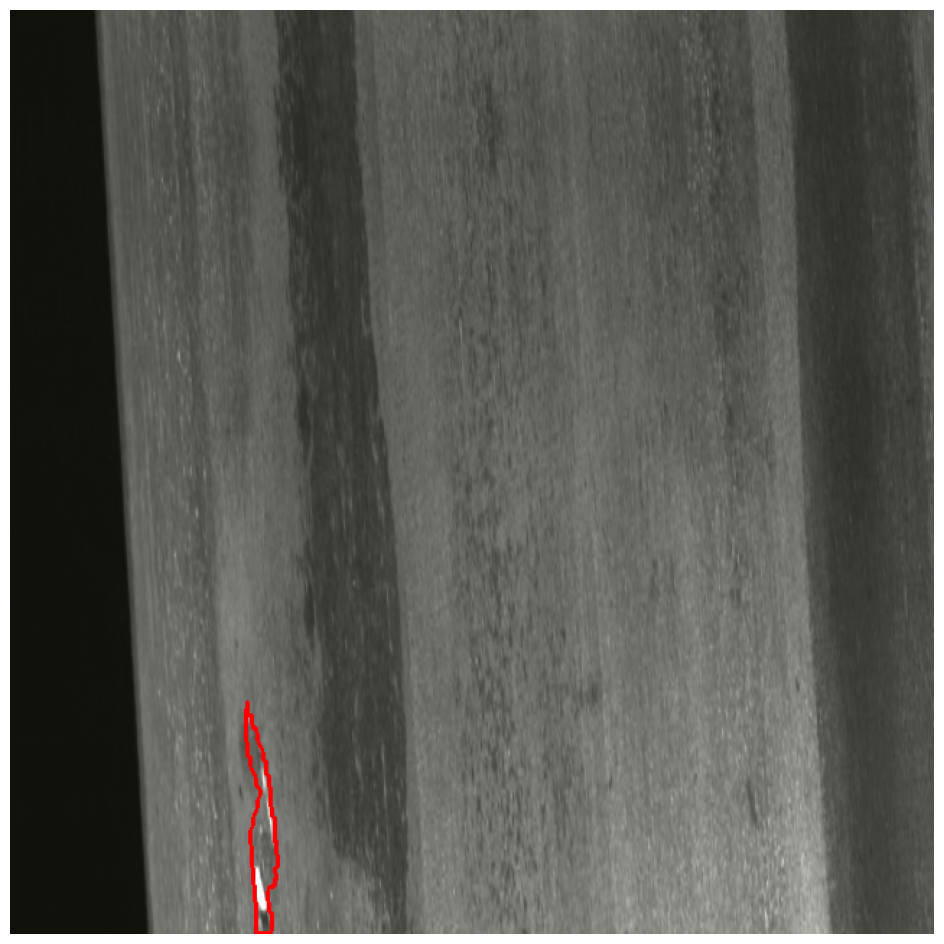

In [64]:
#row_id=train_df_n.index.get_loc('d0fb25531.jpg')
row_id=1

fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df_n)

transformed = train_transform(image=image, masks=masks)
transformed_image = transformed['image']
transformed_masks = transformed['masks']

transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, class_labels)

#print(transformed_keypoints)
visualize(transformed_image, transformed_keypoints)

In [65]:
img_size = 640

train_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    #A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
])

val_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
])

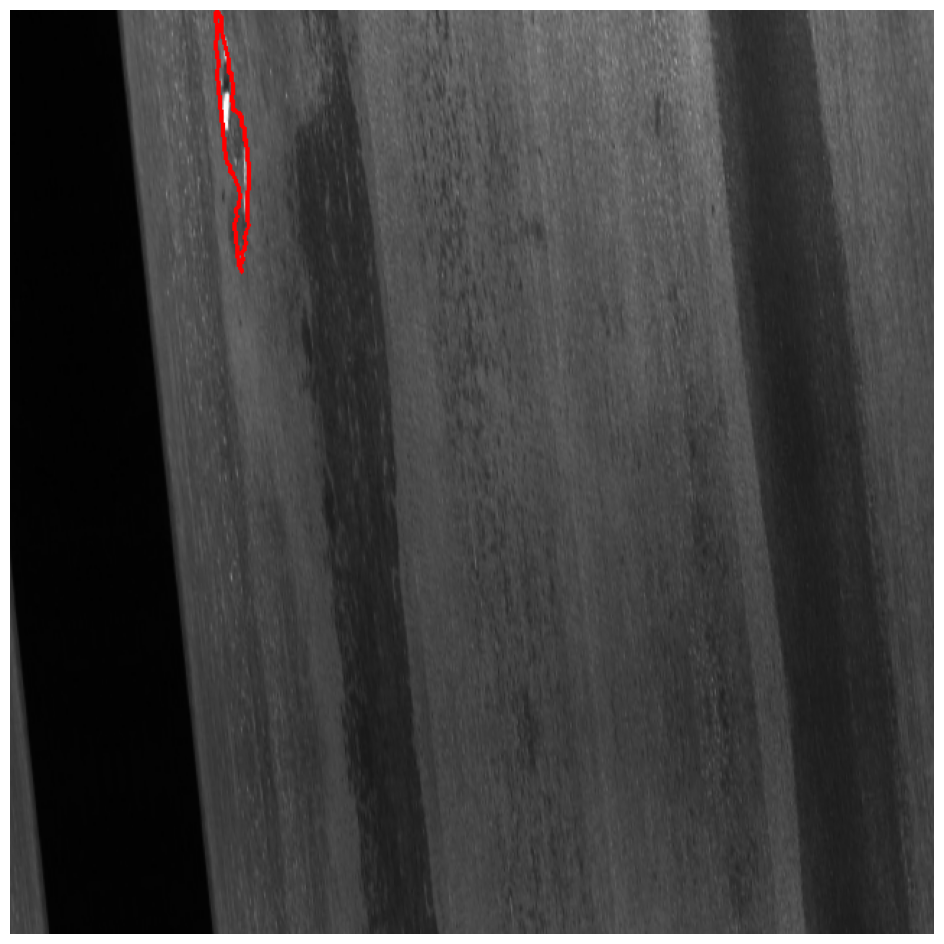

In [66]:
#row_id=train_df_n.index.get_loc('d0fb25531.jpg')
row_id=1

fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df_n)

transformed = train_transform(image=image, masks=masks)
transformed_image = transformed['image']
transformed_masks = transformed['masks']

transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, class_labels)

#print(transformed_keypoints)
visualize(transformed_image, transformed_keypoints)

In [67]:
import shutil
import os

if os.path.isdir('C://seversteel/content/images'):
    shutil.rmtree('C://seversteel/content/images')
if os.path.isdir('C://seversteel/content/labels'):
    shutil.rmtree('C://seversteel/content/labels')

!mkdir "C://seversteel/content/images"
!mkdir "C://seversteel/content/labels"

!mkdir "C://seversteel/content/images/train"
!mkdir "C://seversteel/content/images/val"
#!mkdir test

!mkdir "C://seversteel/content/labels/train"
!mkdir "C://seversteel/content/labels/val"
#!mkdir test

In [68]:
def transform_element(transformM, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii=None):
    transformed = transformM(image=image, masks=masks, class_labels=class_labels)
    transformed_image = transformed['image']
    transformed_masks = transformed['masks']
    transformed_class_labels = transformed['class_labels']
    transformed_name = onlyname
    if ii:
        transformed_name += '_'+str(ii)
    nn=os.path.basename(os.path.normpath(transformed_name))
    cv2.imwrite(outdir1 + nn +'.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)) 
    out_file = open(outdir2 + nn +'.txt', 'w')

    transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, transformed_class_labels)
    
    for iii in range(len(transformed_keypoints)):
        kOut=transformed_keypoints[iii]
        clOut=transformed_class_labels[iii]
        
        if(len(kOut)<6):
            continue
            
        #A.core.keypoints_utils.check_keypoints(kOut, img_size, img_size)
        text=str(clOut) + " " + " ".join([str(b) for b in kOut]) + '\n'
        out_file.write(text)
    out_file.close()

In [69]:
outdir1 = "C://seversteel/content/images/train/"
outdir2 = "C://seversteel/content/labels/train/"

AUG_COUNT=5

for i in range(len(train_df_n)):
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i,train_df_n)
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)
    
    for ii in range(AUG_COUNT):
        transform_element(train_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii)

In [70]:
outdir1 = "C://seversteel/content/images/val/"
outdir2 = "C://seversteel/content/labels/val/"
for i in range(len(val_df_n)):
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i,val_df_n)
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)

In [71]:
f = open("C://seversteel/content/train.yaml", "w")
f.write('path: '+"C://seversteel/content/"+"\n")
f.write('train: images/train'+"\n")
f.write('val: images/val'+"\n")
#f.write('test: images/test'+"\n")
#f.write('nc: 4'+"\n")
f.write('names:'+"\n")
f.write('  0: 0'+"\n")
f.write('  1: 1'+"\n")
f.write('  2: 2'+"\n")
f.write('  3: 3'+"\n")
f.write('  4: 4'+"\n")
f.close()

In [73]:
a = """
# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv8-seg instance segmentation model. For Usage examples see https://docs.ultralytics.com/tasks/segment

# Parameters
nc: 5  # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n-seg.yaml' will call yolov8-seg.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [1024, 3, 2]]  # 7-P5/32
  - [-1, 3, C2f, [1024, True]]
  - [-1, 1, SPPF, [1024, 5]]  # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 6], 1, Concat, [1]]  # cat backbone P4
  - [-1, 3, C2f, [512]]  # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 4], 1, Concat, [1]]  # cat backbone P3
  - [-1, 3, C2f, [256]]  # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]]  # cat head P4
  - [-1, 3, C2f, [512]]  # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]]  # cat head P5
  - [-1, 3, C2f, [1024]]  # 21 (P5/32-large)

  - [[15, 18, 21], 1, Segment, [nc, 32, 256]]  # Segment(P3, P4, P5)"""

f = open("C://seversteel/content/yolov8-seg.yaml", "w")
f.write(a)
f.close()

SyntaxError: invalid syntax (2466054463.py, line 1)

In [76]:
!wandb off

"wandb" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [77]:
if os.path.isdir('C://seversteel/content/runs/segment/train'):
    shutil.rmtree('C://seversteel/content/runs/segment/train')

In [78]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.yaml')

ModuleNotFoundError: No module named 'ultralytics'

In [79]:
results = model.train(data='train.yaml', epochs=30, batch=32, pretrained=False)

AttributeError: 'Sequential' object has no attribute 'train'

In [80]:
image = np.array(Image.open('C://seversteel/content/runs/segment/train/results.png'))
plt.figure(figsize=(20, 20))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'C://seversteel/content/runs/segment/train/results.png'

In [81]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 -> mask, 0 -> background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [ ]:
img_names = sorted(glob.glob("C://seversteel/content/test_images/" + "/*.jpg"))

In [82]:
import torch
from ultralytics import YOLO

model = YOLO('C://seversteel/content/runs/segment/train/weights/last.pt') 

ModuleNotFoundError: No module named 'torch'

In [83]:
test_img = img_names[6]
img = Image.open(test_img)
draw = ImageDraw.Draw(img)

pred_results = model(test_img)

if(pred_results[0].masks):
    masks = pred_results[0].masks.cpu()
    for mask in masks:
        #maskt = mask.data[0].numpy()
        for polygon in mask.xy:
            #mask_img = Image.fromarray(maskt,"I")
            draw.polygon(polygon,outline=(0,255,0), width=5)
img

NameError: name 'img_names' is not defined

Менял параметр скорость обучения, что приводило к уменьшению времени работы модели.
Увеличение BATCH_SIZE повышало время работы.
Снижение порога уверенности привело к тому, что появлялись ошибки в распозновании на некоторых изображениях.

В силу того, что интересна тема сегментирования и детектирования, то было желание выполнить сегментирование на одной из последних моделей. ПРобовал подключить YOLOv8. На данный момент понимаю, что не разобрался. Курс был быстрый и поверхностный и осталось очень много вопросов, которые появляются по мере выполнения работы.
